## H1-B work visa application data for 2018

### Introduction 

In the recent times, immigrations has been a major topic of discussion in the United States. Alien workers working in the US under work visa has been one of the primary contributor in the immigration. As an international students purusing Masters in United States, it's about time I'll be a part this immigration process.    
    
The following anaylsis was performed on the dataset obtained from the website of *Foreign Labour Certification Datacenter* (OFLC), which keeps the track of all the visa applications regarding employement of foregin nationals in United States.
H1B, which is ann employment-based, non-immigrant visa for temporary workers is one of the most common US work visa. The scope of this analysis is limited to the **H1B applications for the year 2018**.     
      
The data can be obtained from the following URL : https://www.foreignlaborcert.doleta.gov/performancedata.cfm#dis  
     
    


### Data Description

The dataset comprised 654,287 observations with 20 features. The features comprised of the information about the H1B visa applicant and the employer sponsoring the applicant. The data also contained information about offered wage and the work location of the applicant. 

Most of the features were complete except for a couple which had ~15,000 missing data. However, the data didn't had any erroneous data values. 

In [1]:
#importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

#importing dataset
h1bData = pd.read_excel("H-1B_Disclosure_Data_FY2018_EOY.xlsx")
h1bData.head()

,CASE_STATUS,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_COUNTRY,AGENT_REPRESENTING_EMPLOYER,SOC_NAME,TOTAL_WORKERS,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE
0,CERTIFIED,H-1B,2018-07-28,2021-07-27,MICROSOFT CORPORATION,WA,USA,N,"SOFTWARE DEVELOPERS, APPLICATIONS",1,Y,112549.0,Year,2017.0,143915.0,0.0,Year,N,N,WA
1,CERTIFIED,H-1B,2017-11-06,2020-11-06,ERNST & YOUNG U.S. LLP,NJ,USA,Y,ACCOUNTANTS AND AUDITORS,1,Y,79976.0,Year,2017.0,100000.0,0.0,Year,N,N,CA
2,CERTIFIED,H-1B,2018-09-10,2021-09-09,LOGIXHUB LLC,TX,USA,N,DATABASE ADMINISTRATORS,1,Y,77792.0,Year,2018.0,78240.0,0.0,Year,N,N,TX
3,CERTIFIED,H-1B,2018-09-10,2021-09-09,"HEXAWARE TECHNOLOGIES, INC.",NJ,USA,Y,"SOFTWARE DEVELOPERS, APPLICATIONS",5,Y,84406.0,Year,2017.0,84406.0,85000.0,Year,Y,N,DE
4,CERTIFIED,H-1B,2018-09-07,2021-09-06,"ECLOUD LABS,INC.",NJ,USA,Y,"SOFTWARE DEVELOPERS, APPLICATIONS",1,Y,87714.0,Year,2018.0,95000.0,0.0,Year,Y,N,AL


In [6]:
#Checking data for missing values 

h1bData.isnull().sum().to_frame()

,0
CASE_STATUS,0
VISA_CLASS,0
EMPLOYMENT_START_DATE,3
EMPLOYMENT_END_DATE,6
EMPLOYER_NAME,12
EMPLOYER_STATE,0
EMPLOYER_COUNTRY,0
AGENT_REPRESENTING_EMPLOYER,16
SOC_NAME,8
TOTAL_WORKERS,0


Couple of variables have somewhere around 2.5% missing data (as comapared to total number of observations). This shouldn't be much of an issue as the variables are not critical to the analysis. 

### Data Analysis

Inital analysis of the data few key insights about the trend in the H1B visa.    
    
* Plotting the top 25 companies with the most number of sponsoring applications. **EY** had the most number of applications, around 150,000, followed by Deloitte consulting and HCL. 

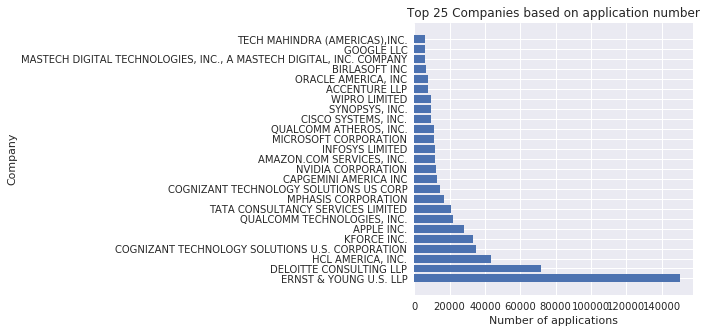

In [18]:
#Plotting the top 25 companies with the most number of visa-applications

d1 = h1bData.groupby(["EMPLOYER_NAME"],as_index=False)["TOTAL_WORKERS"].sum().reset_index()
d1 = d1.sort_values('TOTAL_WORKERS', ascending=False)
#print(d1[["EMPLOYER_NAME","TOTAL_WORKERS"]].head(30))
x = d1.iloc[0:25,1]
y = d1.iloc[0:25,2]
y_pos = np.arange(len(y))
plt.barh(y_pos, y)
plt.yticks(y_pos, x)
plt.title("Top 25 Companies based on application number")
plt.xlabel("Number of applications")
plt.ylabel("Company")
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 10})
plt.show()

* On checking the number of applications certified and deniend, it appeared almost 85% of the applications were certified. 

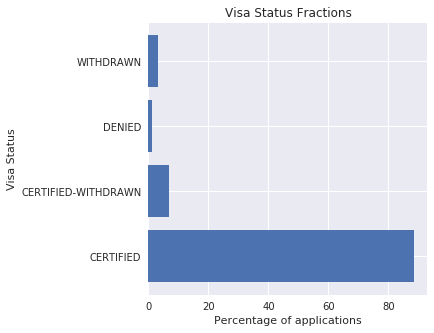

In [17]:
#Plotting percentage of applications denied/accepted

d1 = h1bData.groupby(["CASE_STATUS"])
d1 = d1[["VISA_CLASS"]].count()
d1 = d1.apply(lambda x: x*100/x.sum()).reset_index()
x = d1["CASE_STATUS"]
y = d1["VISA_CLASS"]
y_pos = np.arange(len(y))
plt.barh(y_pos, y)
plt.yticks(y_pos, x)
plt.title("Visa Status Fractions")
plt.xlabel("Percentage of applications")
plt.ylabel("Visa Status")
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams.update({'font.size': 8})
plt.show()

* Analysis of the Standard Occupation Classification (SOC), showed that the SOC with the most applications was **Software Developers**, followed by **Computer System Analyst**. 

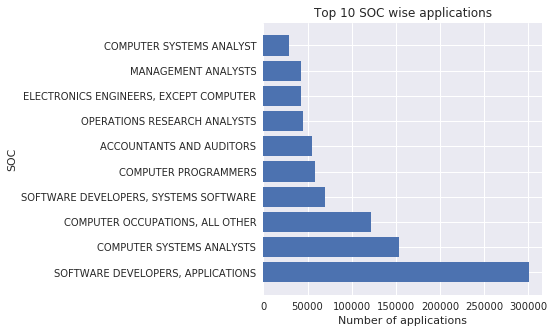

In [20]:
#Plotting the top 10 most commonn Standard Occupation Classification (SOC) 

d1 = h1bData.groupby(["SOC_NAME"],as_index=False)["TOTAL_WORKERS"].sum().reset_index()
d1 = d1.sort_values('TOTAL_WORKERS', ascending=False)
#print(d1[["EMPLOYER_NAME","TOTAL_WORKERS"]].head(30))
x = d1.iloc[0:10,1]
y = d1.iloc[0:10,2]
y_pos = np.arange(len(y))
plt.barh(y_pos, y)
plt.yticks(y_pos, x)
plt.title("Top 10 SOC wise applications")
plt.xlabel("Number of applications")
plt.ylabel("SOC")
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams.update({'font.size': 8})
plt.show()

* On analyzing the worksite states with most number of applications revealed **California** as the most popular state with more the 300,000 applications. Following CA were **Texas** and and **New York** with a relatively less than half number of applications as compared to CA. 

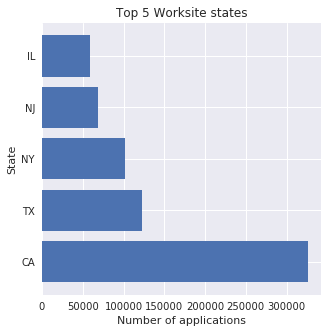

In [22]:
# Worksite state-wise application count

d1 = h1bData.groupby(["WORKSITE_STATE"],as_index=False)["TOTAL_WORKERS"].sum().reset_index()
d1 = d1.sort_values('TOTAL_WORKERS', ascending=False)
x = d1.iloc[0:5,1]
y = d1.iloc[0:5,2]
y_pos = np.arange(len(y))
plt.barh(y_pos, y)
plt.yticks(y_pos, x)
plt.title("Top 5 Worksite states")
plt.xlabel("Number of applications")
plt.ylabel("State")
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams.update({'font.size': 10})
plt.show()

* Further analysis of the worksite state wise data revealed that a fraction of Certified, denied and withdrawn applications were similar across state

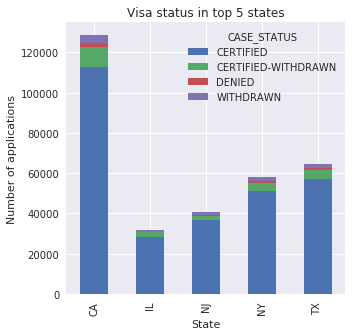

In [23]:
d1 = h1bData[h1bData["WORKSITE_STATE"].isin(["CA","NY","NJ","TX","IL"])]
d1.groupby(['WORKSITE_STATE','CASE_STATUS']).size().unstack().plot(kind='bar', stacked=True)
plt.title("Visa status in top 5 states")
plt.xlabel("State")
plt.ylabel("Number of applications")
plt.show()

### Summary 

As a non-US citizen with the future prospects of working the United States, the analysis of the data provided few interesting trends. Primarily, job prospects are much higher in the state of *California* as compared to any other states, followed by Texas, New York and New Jersey. Moreover, working in the *Software Development or Computer systems* domain increases the chances of getting a job, thus increasing the chances of getting a visa. Also, overall *consulting* companies seems to have tha major share in the H1B applications as compared to tech companies. This highlight is specifically helpful which will assist me focusing my efforts towards consulting companies when looking for a job and sponsorship. 

The inital anaylsis provided few key highlights. However, a further anaylsis of the data might provide some more useful trends and insights about the H1B process. 

*****

****